In [1]:
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import pandas as pd
from torch import tensor
import numpy as np
from torch.utils.data import Dataset
from sklearn.metrics import mean_squared_error
import random
import os
import matplotlib.pyplot as plt
#from numba import jit
import pickle
from scipy.interpolate import interp1d
from torch.utils.data import DataLoader, random_split
import torch
from torchsummary import summary

torch.backends.cudnn.benchmark = True
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [2]:
import pickle

with open("../Data/sampleRanges.pkl", "rb") as f:
    a = pickle.load(f)

print(a)

[[10002.064891159534, 20525.368452072144], [1184.8342418670654, 24983.96396636963], [0.48001662007905543, 0.4963285802602768], [0.48002141393721104, 0.49897557336091997], [1.0106930956244467e-11, 8.954087936878205e-10], [1.2524750186130404e-11, 9.997882181406023e-10]]


In [2]:
!pip install torchsummary

# Model

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(2, 32, kernel_size=5, padding=1)
        self.pool1 = nn.MaxPool1d(kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm1d(32)
        
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.bn2 = nn.BatchNorm1d(64)
        
        self.conv3 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.bn3 = nn.BatchNorm1d(128)
        
        """ self.conv4 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.pool4 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.bn4 = nn.BatchNorm1d(128)"""
        
        self.conv5 = nn.Conv1d(128, 64, kernel_size=3, padding=1)
        self.pool5 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.bn5 = nn.BatchNorm1d(64)
        
        
        self.fc1 = nn.Linear(896, 256)
        self.d1 = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(256, 64)
        self.d2 = nn.Dropout(0.5)
        
        self.fc3 = nn.Linear(64, 6)

    def forward(self, x):
        batch_size = x.shape[0]
        x = self.pool1(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool2(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool3(torch.relu(self.bn3(self.conv3(x))))
        
       # x = self.pool4(torch.relu(self.bn4(self.conv4(x))))
        
        #x = x.view(batch_size, -1)
        
        x = torch.relu(self.fc1(x))
        x = self.d1(x)
        
        x = torch.relu(self.fc2(x))
        x = self.d2(x)
        
        
        
        x = self.fc3(x)
        return x

In [108]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(2, 128, kernel_size=5, padding=1)
        self.pool1 = nn.MaxPool1d(kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm1d(128)
        
        self.conv2 = nn.Conv1d(128, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.bn2 = nn.BatchNorm1d(64)
        
        self.conv3 = nn.Conv1d(64, 32, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.bn3 = nn.BatchNorm1d(32)
        
        self.fc1 = nn.Linear(480, 256)
        self.d1 = nn.Dropout(0.25)
        
        self.fc2 = nn.Linear(256, 64)
        self.d2 = nn.Dropout(0.25)
        
        self.fc3 = nn.Linear(64, 6)

    def forward(self, x):
        x = x.type(torch.FloatTensor)
        #print(type(x))
        batch_size = x.shape[0]
        x = self.pool1(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool2(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool3(torch.relu(self.bn3(self.conv3(x))))
        
       # x = self.pool4(torch.relu(self.bn4(self.conv4(x))))
        
        x = x.view(batch_size, -1)
        
        x = torch.relu(self.fc1(x))
        x = self.d1(x)
        
        x = torch.relu(self.fc2(x))
        x = self.d2(x)
        
        
        
        x = self.fc3(x)
        return x

In [5]:
class NetV2(nn.Module):
    def __init__(self):
        super(NetV2, self).__init__()
        self.conv1 = nn.Conv1d(1, 128, kernel_size=5, padding=1)
        self.pool1 = nn.MaxPool1d(kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm1d(128)
        
        self.conv2 = nn.Conv1d(128, 64, kernel_size=5, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.bn2 = nn.BatchNorm1d(64)
        
        self.conv3 = nn.Conv1d(64, 32, kernel_size=5, padding=1)
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.bn3 = nn.BatchNorm1d(32)
        
        self.fc1 = nn.Linear(416, 128)
        self.d1 = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(128, 64)
        self.d2 = nn.Dropout(0.5)
        
        self.fc3 = nn.Linear(64, 6)

    def forward(self, x):
        x = x[:, 0]
        batch_size = x.shape[0]
        x = x.reshape(batch_size, 1, -1)
        x = self.pool1(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool2(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool3(torch.relu(self.bn3(self.conv3(x))))
        
       # x = self.pool4(torch.relu(self.bn4(self.conv4(x))))
        
        x = x.view(batch_size, -1)
        
        x = torch.relu(self.fc1(x))
        x = self.d1(x)
        
        x = torch.relu(self.fc2(x))
        x = self.d2(x)
        
        
        
        x = self.fc3(x)
        return x

In [109]:
net = Net()

In [110]:
summary(net, (2, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [-1, 128, 126]           1,408
       BatchNorm1d-2             [-1, 128, 126]             256
         MaxPool1d-3              [-1, 128, 61]               0
            Conv1d-4               [-1, 64, 61]          24,640
       BatchNorm1d-5               [-1, 64, 61]             128
         MaxPool1d-6               [-1, 64, 30]               0
            Conv1d-7               [-1, 32, 30]           6,176
       BatchNorm1d-8               [-1, 32, 30]              64
         MaxPool1d-9               [-1, 32, 15]               0
           Linear-10                  [-1, 256]         123,136
          Dropout-11                  [-1, 256]               0
           Linear-12                   [-1, 64]          16,448
          Dropout-13                   [-1, 64]               0
           Linear-14                   

# Train/test functions

In [103]:
def train(train_loader, net, LR=0.1, epochs=2000, val_loader=None):
    net.to(DEVICE)
    optimizer = optim.Adam(net.parameters(), lr=LR)
    criterion = nn.L1Loss()
    all_MSE = nn.L1Loss()
    val_losses = []
    print(f"Using: {DEVICE}")
                            
    parameter_loss = []
    losses = []
    processed = 0
    last_loss = 0
    for epoch in range(epochs):
        loss = 0
        
        net.train()
        with tqdm(train_loader, unit="batch") as it:
            if epoch > 0:
                it.set_postfix(lastLoss=last_loss, valLoss=val_losses[-1])
            for idx, data in enumerate(it):
                it.set_description(f"Epoch {epoch+1}/{epochs}")
                inp, out = data['input'].to(DEVICE), data['output'].to(DEVICE)
                
                optimizer.zero_grad()
                predicted = net(inp)

                cost = criterion(out, predicted)
                loss += cost.item()
                cost.backward()
                optimizer.step()
                
                for i in range(len(predicted)):
                    current_MSE = []
                    for j in range(6):
                        current_MSE.append(all_MSE(out[i][j], predicted[i][j]).item())
                    parameter_loss.append(current_MSE)
                    processed += 1
        
        if val_loader:
            val_loss = 0
            net.eval()
            for idx, data in enumerate(val_loader):
                inp, out = data['input'].to(DEVICE), data['output'].to(DEVICE)

                predicted = net(inp)
                cost = criterion(out, predicted)
                val_loss += cost.item()
            val_loss /= len(val_loader)  
            val_losses.append(val_loss)
        
        losses.append(loss)
        last_loss = loss/len(it)
    print("Parameters: Skin YM, Adipose YM, Skin PR, Adipose PR, Skin Perm, Adipose Perm")
    print(f"Sampled Ranges: 10e3 - 50e3, 1e3 - 25e3, 0.48 - 0.499, 0.48 - 0.499, 10e - 12-10e10, 10e-12 - 10e10") 
    print(f"Average parameter loss: {np.mean(np.reshape(np.array(parameter_loss), (-1, 6)), axis=0)}")        
    print(f"Average overall loss: {np.sum(losses)/processed}")
    return losses, parameter_loss, val_losses

def test(test_loader, net):
    net.to(DEVICE)
    net.eval()
    criterion = nn.L1Loss()
    crit = nn.L1Loss()
    differences = []
    

    with torch.no_grad():
            loss = 0
            with tqdm(test_loader, unit=" batch") as it:
                for idx, data in enumerate(it):
                    inp, out = data['input'].to(DEVICE), data['output'].to(DEVICE)
                    
                    predicted = net(inp)
                    cost = criterion(out, predicted)
                    l_t = cost.item()
                    loss += l_t
                    for i in range(len(predicted)):
                        p = predicted[i].cpu().numpy().reshape(1, -1)
                        o = out[i].cpu().numpy().reshape(1, -1)
                        
                        p = SCALER.inverse_transform(p)[0]
                        o = SCALER.inverse_transform(o)[0]

                        
                        differences.append(np.abs(p-o))
                        #print("D", differences[-1])
                        #print(F"Predicted: {SCALER.inverse_transform(p)}")
                        #print(F"Real: {SCALER.inverse_transform(o)}")
                        #print(f"Difference: {abs(p - o)}\n\n")
                        #processed += 1
                    
                    #print(f"\n\n\nBatch: {idx}")
                   # print(f"loss: {l_t}")
            print(differences[0])
            print(np.array(differences).shape)
            print(f"Average Loss: {loss/len(test_loader)}")
            print(f"Average parameter loss: {np.mean(np.array(differences), axis=0)}") 

In [87]:
test(test_loader, net)

100%|██████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 90.03 batch/s]

[1.00721484e+03 5.26207422e+03 1.21077895e-03 3.40700150e-04
 7.80824710e-11 1.44740053e-10]
(443, 6)
Average Loss: 0.18910994487149374
Average parameter loss: [4.4386133e+03 6.0184697e+03 2.0981678e-03 4.7563226e-03 1.5636933e-10
 2.5097821e-10]


# Dataset

In [7]:
with open("filtered.pkl", "rb") as f:
    runs = pickle.load(f)

In [8]:
from sklearn.preprocessing import MinMaxScaler
SCALER = MinMaxScaler()

In [9]:
# Folder name will correspond to index of sample

from sklearn.preprocessing import MinMaxScaler
SCALER = MinMaxScaler()
class Data(Dataset):
    def __init__(self, signalFolder, sampleFile, runs=range(65535), steps=128):
        # Load both disp1 and disp2 from each folder
        # Folders ordered according to index of sample
        # Use the corresponding sample as y -> append probe?
        self.input = []
        self.output = []
        
        with open(f"{sampleFile}", "rb") as f:
             samples = pickle.load(f)
        
        self.min = np.min(samples[runs])
        self.max = np.max(samples[runs])
        
        for run in tqdm(runs): #os.listdir(f"{signalFolder}/"):  
            inp = []
            fail = False
            
            files = os.listdir(f"{signalFolder}/{run}/")
            
            if files != ['Disp1.csv', 'Disp2.csv']:
                continue
            
            for file in files:
                a = pd.read_csv(f"{signalFolder}/{run}/{file}")
                a.rename(columns = {'0':'x', '0.1': 'y'}, inplace = True)
                
                if a['x'].max() != 7.0:
                    fail = True
                    break
                #a = pd.concat([pd.DataFrame([[0,0.1]], columns=a.columns), a], ignore_index=True)
                

                # Interpolate curve for consistent x values
                xNew = np.linspace(0, 7, num=steps, endpoint=False)
                interped = interp1d(a['x'], a['y'], kind='cubic', fill_value="extrapolate")(xNew)
                    
                #fix, ax = plt.subplots(1, 2)
                #ax[0].plot(xNew, interped)
                #a.plot(ax=ax[1], x='x', y='y')
                #if run == 3:
                   # break
                
                
                #if len(a) < 702:
                #    print(f"{signalFolder}/{run}/{file}: {len(a)}")
               #     fail = True
                 #   break
                
               # while len(a) > 702:
                #    a = a.drop(index=np.random.randint(0, len(a)-1)).reset_index(drop=True)
                
                #print(a)
                
                inp.append(interped.astype("float32"))
            
            if not fail:
                if len(inp) != 2:
                    raise Exception("sdf")
                #print(inp[0])
                #raise Exception("sdf")

                self.input.append(inp)
                self.output.append(samples[int(run)])
        
        SCALER.fit(self.output)
        self.output = SCALER.fit_transform(self.output)
        self.output = tensor(self.output).type(torch.cuda.FloatTensor)
        self.input = tensor(self.input).type(torch.cuda.FloatTensor)
        
    def __len__(self):
        return len(self.output)
    
    def __getitem__(self, idx):
        sample = {"input": self.input[idx], "output": self.output[idx]}
        return sample

In [10]:
dataset = Data("D:/SamplingResults", "C:/Users/rjsou/Documents/MastersDiss/Sampling/Samples.pkl", runs=[0, 1, 2])

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 46.87it/s]
C:\Users\rjsou\AppData\Local\Temp\ipykernel_7316\3404371057.py:73: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:233.)
  self.input = tensor(self.input).type(torch.cuda.FloatTensor)


In [13]:
dataset = Data("D:/SamplingResults", "C:/Users/rjsou/Documents/MastersDiss/Sampling/Samples.pkl", runs=runs)

100%|██████████████████████████████████████████████████████████████████████████████| 2236/2236 [00:25<00:00, 86.59it/s]


In [12]:
len(runs)

2236

In [88]:
train_n = int(0.8 * len(dataset))
test_n = len(dataset) - train_n
train_set, test_set = random_split(dataset, [train_n, test_n])
train_loader, test_loader = DataLoader(train_set, batch_size=32, shuffle=True), DataLoader(test_set, batch_size=32, shuffle=True)

# Training/testing

In [98]:
net = Net()

In [99]:
loss, p_loss, v_loss = train(train_loader, net, val_loader=test_loader, LR=0.0001, epochs=3000)

Using: cuda:0


Epoch 136/3000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 24.18batch/s, lastLoss=0.122, valLoss=0.112]


Epoch 272/3000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 26.35batch/s, lastLoss=0.111, valLoss=0.119]


Epoch 408/3000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 26.69batch/s, lastLoss=0.108, valLoss=0.127]


Epoch 544/3000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 26.77batch/s, lastLoss=0.102, valLoss=0.114]


Epoch 680/3000: 100%|███████████████████████████████████| 56/56 [00:02<00:00, 26.38batch/s, lastLoss=0.1, valLoss=0.11]


Epoch 816/3000: 100%|███████████████████████████████| 56/56 [00:02<00:00, 26.81batch/s, lastLoss=0.0955, valLoss=0.126]


Epoch 952/3000: 100%|███████████████████████████████| 56/56 [00:02<00:00, 26.76batch/s, lastLoss=0.0929, valLoss=0.204]


Epoch 1088/3000: 100%|███████████████████████████████| 56/56 [00:02<00:00, 27.65batch/s, lastLoss=0.0925, valLoss=0.16]


Epoch 1224/3000: 100%|███████████████████████████████| 56/56 [00:02<00:00, 25.85batch/s, lastLoss=0.0902, valLoss=0.16]


Epoch 1360/3000: 100%|███████████████████████████████| 56/56 [00:02<00:00, 26.41batch/s, lastLoss=0.087, valLoss=0.162]


Epoch 1496/3000: 100%|██████████████████████████████| 56/56 [00:02<00:00, 26.73batch/s, lastLoss=0.0863, valLoss=0.165]


Epoch 1632/3000: 100%|██████████████████████████████| 56/56 [00:02<00:00, 27.20batch/s, lastLoss=0.0852, valLoss=0.277]


Epoch 1768/3000: 100%|██████████████████████████████| 56/56 [00:02<00:00, 27.70batch/s, lastLoss=0.0855, valLoss=0.155]


Epoch 1904/3000: 100%|███████████████████████████████| 56/56 [00:02<00:00, 26.62batch/s, lastLoss=0.0833, valLoss=0.16]


Epoch 2040/3000: 100%|██████████████████████████████| 56/56 [00:02<00:00, 26.83batch/s, lastLoss=0.0822, valLoss=0.243]


Epoch 2176/3000: 100%|███████████████████████████████| 56/56 [00:01<00:00, 28.38batch/s, lastLoss=0.081, valLoss=0.234]


Epoch 2312/3000: 100%|██████████████████████████████| 56/56 [00:02<00:00, 26.54batch/s, lastLoss=0.0801, valLoss=0.194]


Epoch 2448/3000: 100%|██████████████████████████████| 56/56 [00:02<00:00, 27.21batch/s, lastLoss=0.0809, valLoss=0.136]


Epoch 2584/3000: 100%|██████████████████████████████| 56/56 [00:02<00:00, 26.02batch/s, lastLoss=0.0777, valLoss=0.149]


Epoch 2720/3000: 100%|██████████████████████████████| 56/56 [00:02<00:00, 26.31batch/s, lastLoss=0.0789, valLoss=0.248]


Epoch 2856/3000: 100%|██████████████████████████████| 56/56 [00:02<00:00, 25.28batch/s, lastLoss=0.0778, valLoss=0.158]


Epoch 2992/3000: 100%|██████████████████████████████| 56/56 [00:02<00:00, 27.96batch/s, lastLoss=0.0777, valLoss=0.211]


Epoch 3000/3000: 100%|███████████████████████████████| 56/56 [00:01<00:00, 28.45batch/s, lastLoss=0.076, valLoss=0.145]


Parameters: Skin YM, Adipose YM, Skin PR, Adipose PR, Skin Perm, Adipose Perm
Sampled Ranges: 10e3 - 50e3, 1e3 - 25e3, 0.48 - 0.499, 0.48 - 0.499, 10e - 12-10e10, 10e-12 - 10e10
Average parameter loss: [0.05963021 0.11076267 0.08764589 0.1118236  0.11993491 0.05875472]
Average overall loss: 0.002894244226716501


In [122]:
loss, p_loss, v_loss = train(train_loader, net, val_loader=test_loader, LR=0.001, epochs=3000)

Using: cuda:0


Epoch 136/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 24.76batch/s, lastLoss=0.125, valLoss=0.294]


Epoch 272/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 25.06batch/s, lastLoss=0.122, valLoss=0.263]


Epoch 408/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 25.24batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 544/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 25.22batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 680/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 25.00batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 816/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 25.05batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 952/3000: 100%|█████████████████████████████████| 34/34 [00:01<00:00, 25.25batch/s, lastLoss=0.189, valLoss=0.19]


Epoch 1088/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 23.96batch/s, lastLoss=0.189, valLoss=0.193]


Epoch 1224/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.05batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 1360/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.13batch/s, lastLoss=0.189, valLoss=0.194]


Epoch 1496/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.37batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 1632/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.96batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 1768/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.05batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 1904/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.39batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 2040/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.38batch/s, lastLoss=0.189, valLoss=0.193]


Epoch 2176/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.30batch/s, lastLoss=0.189, valLoss=0.194]


Epoch 2312/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.46batch/s, lastLoss=0.189, valLoss=0.193]


Epoch 2448/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.87batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 2584/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.23batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 2720/3000: 100%|█████████████████████████████████| 34/34 [00:01<00:00, 25.13batch/s, lastLoss=0.19, valLoss=0.19]


Epoch 2856/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.79batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 2992/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.29batch/s, lastLoss=0.189, valLoss=0.194]


Epoch 3000/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.67batch/s, lastLoss=0.189, valLoss=0.191]


Parameters: Skin YM, Adipose YM, Skin PR, Adipose PR, Skin Perm, Adipose Perm
Sampled Ranges: 10e3 - 50e3, 1e3 - 25e3, 0.48 - 0.499, 0.48 - 0.499, 10e - 12-10e10, 10e-12 - 10e10
Average parameter loss: [0.1030764  0.24835071 0.09814856 0.23619612 0.16671643 0.24115669]
Average overall loss: 0.005759680169598745


In [107]:
test(test_loader, net)

100%|██████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 90.04 batch/s]

[5.5365547e+03 7.3860439e+03 1.0707080e-03 1.1120051e-02 3.8834264e-10
 5.6305099e-12]
(443, 6)
Average Loss: 0.19556456697838648
Average parameter loss: [3.3827737e+03 9.7235029e+03 1.9424031e-03 6.0038958e-03 1.7266504e-10
 8.8912828e-11]


In [57]:
test(test_loader, net)

 36%|████████████████████████████▏                                                  | 5/14 [00:00<00:00, 41.80 batch/s]

D [[7.4917539e+03 5.2944805e+03 1.7914772e-03 7.4607134e-04 8.0053873e-11
  3.2331532e-10]]
D [[1.5453281e+03 4.8211807e+03 1.7609298e-03 9.5740557e-03 5.0382781e-11
  2.9591979e-10]]
D [[7.2644336e+03 9.7127891e+03 7.2985888e-04 3.1915009e-03 4.2627041e-11
  7.9626583e-11]]
D [[1.9851186e+04 7.8996890e+03 3.3774674e-03 5.9150755e-03 5.5840735e-11
  6.2302358e-11]]
D [[2.3875078e+03 5.2621240e+03 7.0054233e-03 4.7227740e-03 4.3563930e-11
  4.7341731e-10]]
D [[6.6696992e+03 3.1256641e+02 4.0604770e-03 7.4800253e-03 2.5680291e-11
  2.4352331e-10]]
D [[7.4552812e+03 1.7719844e+03 1.9481480e-03 7.6920688e-03 2.1575626e-10
  4.6097887e-10]]
D [[1.9903164e+03 3.2312539e+03 1.4352500e-03 6.7697465e-03 3.7583647e-10
  3.5099396e-10]]
D [[8.012617e+02 8.089824e+02 6.726384e-04 3.354162e-03 5.556071e-10
  3.858025e-10]]
D [[1.6690273e+03 1.1337836e+04 3.4502149e-04 5.6884587e-03 2.3190115e-10
  3.9322301e-10]]
D [[2.1986836e+03 1.3625967e+03 4.6537817e-03 4.8362315e-03 6.6756461e-12
  3.5978887e

100%|██████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 40.86 batch/s]

D [[3.1810547e+02 9.7235645e+03 2.3880601e-04 6.6264570e-03 4.0641129e-10
  3.0599029e-10]]
D [[2.0260703e+03 1.5282197e+03 2.8592348e-04 2.2551715e-03 2.6258135e-10
  3.7902187e-10]]
D [[8.7505469e+02 4.3245742e+03 2.3925602e-03 5.9046745e-03 4.8688842e-10
  3.2424735e-10]]
D [[8.9504297e+02 2.5184961e+02 4.8675835e-03 1.3238490e-03 8.9779281e-11
  2.9840169e-10]]
D [[1.8597344e+03 1.0184471e+04 4.4980943e-03 5.3303838e-03 1.5853291e-12
  1.4758136e-10]]
D [[1.1288203e+03 7.9405293e+03 7.1697533e-03 8.3146095e-03 5.7029173e-11
  2.6008640e-11]]
D [[6.5071094e+02 8.9678145e+03 2.1305382e-03 1.9853413e-03 8.2676380e-11
  1.9910923e-10]]
D [[2.0440234e+03 7.9701309e+03 1.8827915e-03 8.2875192e-03 1.2748426e-10
  2.3297769e-10]]
D [[1.6287773e+03 6.8872363e+03 5.5021048e-04 1.6144216e-03 7.1869044e-10
  3.0682196e-10]]
D [[2.8016766e+04 7.0257676e+03 2.2670627e-04 3.0432045e-03 4.8588022e-11
  4.8897353e-10]]
D [[6.1745000e+03 2.1410273e+03 4.2676628e-03 4.1186810e-04 4.3773929e-11
  1.37

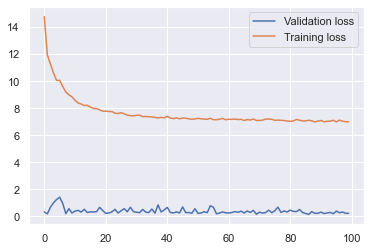

In [89]:
import seaborn as sns
sns.set_theme()
# MAE
plt.plot(range(len(v_loss))[:100], v_loss[:100], label="Validation loss")
plt.plot(range(len(v_loss))[:100], loss[:100], label="Training loss")
plt.legend()

In [113]:
min(v_loss)
max(v_loss)

0.36354111986500875

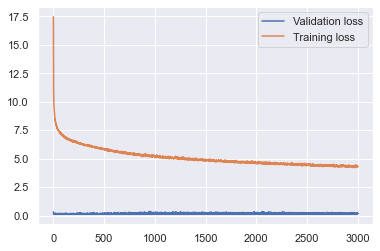

In [111]:
import seaborn as sns
sns.set_theme()
# MAE
plt.plot(range(len(v_loss)), v_loss, label="Validation loss")
plt.plot(range(len(v_loss)), loss, label="Training loss")
plt.legend()

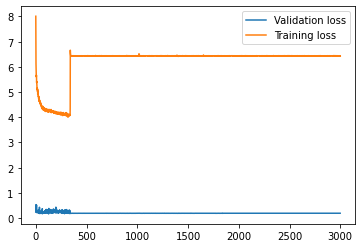

In [124]:
plt.plot(range(len(v_loss)), v_loss, label="Validation loss")
plt.plot(range(len(v_loss)), loss, label="Training loss")
plt.legend()

# Net v2 - larger kernels

In [94]:
net = NetV2()

In [95]:
loss, p_loss, v_loss = train(train_loader, net, val_loader=test_loader, LR=0.001, epochs=3000)

Using: cuda:0


Epoch 136/3000: 100%|█████████████████████████████████| 56/56 [00:02<00:00, 26.14batch/s, lastLoss=0.141, valLoss=3.67]


Epoch 272/3000: 100%|█████████████████████████████████| 56/56 [00:02<00:00, 26.75batch/s, lastLoss=0.139, valLoss=10.2]


Epoch 408/3000: 100%|█████████████████████████████████| 56/56 [00:02<00:00, 26.49batch/s, lastLoss=0.138, valLoss=3.35]


Epoch 544/3000: 100%|█████████████████████████████████| 56/56 [00:02<00:00, 26.04batch/s, lastLoss=0.134, valLoss=8.33]


Epoch 680/3000: 100%|█████████████████████████████████| 56/56 [00:02<00:00, 26.79batch/s, lastLoss=0.133, valLoss=3.63]


Epoch 816/3000: 100%|█████████████████████████████████| 56/56 [00:02<00:00, 26.96batch/s, lastLoss=0.131, valLoss=2.33]


Epoch 952/3000: 100%|█████████████████████████████████| 56/56 [00:02<00:00, 26.23batch/s, lastLoss=0.129, valLoss=6.42]


Epoch 1088/3000: 100%|███████████████████████████████| 56/56 [00:02<00:00, 27.16batch/s, lastLoss=0.129, valLoss=0.198]


Epoch 1224/3000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 26.09batch/s, lastLoss=0.128, valLoss=2.97]


Epoch 1360/3000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 26.99batch/s, lastLoss=0.128, valLoss=5.32]


Epoch 1496/3000: 100%|███████████████████████████████| 56/56 [00:02<00:00, 23.63batch/s, lastLoss=0.126, valLoss=0.383]


Epoch 1632/3000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 27.10batch/s, lastLoss=0.126, valLoss=1.98]


Epoch 1768/3000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 26.20batch/s, lastLoss=0.126, valLoss=3.03]


Epoch 1904/3000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 27.43batch/s, lastLoss=0.125, valLoss=1.72]


Epoch 2040/3000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 27.10batch/s, lastLoss=0.126, valLoss=8.11]


Epoch 2176/3000: 100%|██████████████████████████████████| 56/56 [00:02<00:00, 26.81batch/s, lastLoss=0.124, valLoss=13]


Epoch 2312/3000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 26.28batch/s, lastLoss=0.122, valLoss=27.4]


Epoch 2448/3000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 26.53batch/s, lastLoss=0.125, valLoss=11.5]


Epoch 2584/3000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 26.48batch/s, lastLoss=0.124, valLoss=10.8]


Epoch 2720/3000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 23.44batch/s, lastLoss=0.123, valLoss=3.12]


Epoch 2856/3000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 26.71batch/s, lastLoss=0.122, valLoss=11.4]


Epoch 2992/3000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 25.84batch/s, lastLoss=0.123, valLoss=14.6]


Epoch 3000/3000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 27.37batch/s, lastLoss=0.122, valLoss=15.3]


Parameters: Skin YM, Adipose YM, Skin PR, Adipose PR, Skin Perm, Adipose Perm
Sampled Ranges: 10e3 - 50e3, 1e3 - 25e3, 0.48 - 0.499, 0.48 - 0.499, 10e - 12-10e10, 10e-12 - 10e10
Average parameter loss: [0.08676296 0.15472708 0.09661645 0.18781779 0.14137261 0.10572939]
Average overall loss: 0.00407699779605742


# RNN

In [14]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.conv1 = nn.Conv1d(2, 128, kernel_size=5, padding=1)
        self.pool1 = nn.MaxPool1d(kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm1d(128)
        
        self.conv2 = nn.Conv1d(128, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.bn2 = nn.BatchNorm1d(64)
        
        self.conv3 = nn.Conv1d(64, 32, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.bn3 = nn.BatchNorm1d(32)
        
        self.rnn = nn.RNN(15, 256, batch_first=True)
        
        self.fc1 = nn.Linear(256, 128)
        self.d1 = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(4096 , 128)
        self.d2 = nn.Dropout(0.75)
        
        self.fc3 = nn.Linear(128, 6)

    def forward(self, x):
        batch_size = x.shape[0]
        x = self.pool1(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool2(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool3(torch.relu(self.bn3(self.conv3(x))))
        
       # x = self.pool4(torch.relu(self.bn4(self.conv4(x))))
        
        
        
       # x = x.view(batch_size, -1)
        h0 = torch.zeros(1, batch_size, 256).to(x.device)
        x, _ = self.rnn(x, h0)
        
        
        x = torch.relu(self.fc1(x))
        x = self.d1(x)
        x = x.view(batch_size, -1)
        
        x = torch.relu(self.fc2(x))
        x = self.d2(x)
        
        
        
        
        
        x = self.fc3(x)
        
        x = x.view(batch_size, 6)
        return x

In [25]:
net = Net()
summary(net, (2, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [-1, 128, 126]           1,408
       BatchNorm1d-2             [-1, 128, 126]             256
         MaxPool1d-3              [-1, 128, 61]               0
            Conv1d-4               [-1, 64, 61]          24,640
       BatchNorm1d-5               [-1, 64, 61]             128
         MaxPool1d-6               [-1, 64, 30]               0
            Conv1d-7               [-1, 32, 30]           6,176
       BatchNorm1d-8               [-1, 32, 30]              64
         MaxPool1d-9               [-1, 32, 15]               0
           Linear-10                  [-1, 256]         123,136
          Dropout-11                  [-1, 256]               0
           Linear-12                   [-1, 64]          16,448
          Dropout-13                   [-1, 64]               0
           Linear-14                   

In [97]:
net = RNN()

In [70]:
test(test_loader, net)

 21%|████████████████▉                                                              | 3/14 [00:00<00:00, 21.94 batch/s]

Predicted [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
Ture [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
difference [[-7.7600000e+02 -1.0385605e+03 -4.4983625e-04  6.2399209e-03
  -1.2738656e-10 -1.7701290e-10]]



Predicted [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
Ture [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
difference [[-7.3046055e+03  5.7001953e+02 -1.2012720e-03 -1.6446412e-03
  -2.5581093e-10  1.1975582e-10]]



Predicted [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
Ture [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
difference [[-1.6327734e+03  5.0609561e+03  1.8491745e-03 -5.0244927e-03
   1.6347554e-10  4.6457990e-10]]



Predicted [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5

 43%|█████████████████████████████████▊                                             | 6/14 [00:00<00:00, 21.45 batch/s]

Predicted [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
Ture [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
difference [[ 1.7444531e+02 -8.8704609e+03  2.1125674e-03 -6.5080822e-03
  -3.6397391e-10  4.0370562e-10]]



Predicted [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
Ture [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
difference [[ 2.1174531e+03  3.1590625e+02  6.3815713e-04 -3.4324825e-03
  -2.5909447e-10 -5.6708915e-11]]



Predicted [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
Ture [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
difference [[-2.7489180e+03 -8.6377266e+03 -7.7244639e-04  2.8878450e-05
   5.6430430e-11  2.9246283e-10]]



Predicted [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5

 86%|██████████████████████████████████████████████████████████████████▊           | 12/14 [00:00<00:00, 22.10 batch/s]

Predicted [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
Ture [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
difference [[ 1.2405586e+03 -3.4773789e+03  3.6400855e-03  8.5942447e-03
   5.2824189e-11 -2.2121638e-11]]



Predicted [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
Ture [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
difference [[-2.6004062e+03  8.6756406e+03 -1.7028451e-03 -8.6766779e-03
   7.0460027e-12  3.7717107e-10]]



Predicted [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
Ture [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
difference [[-2.2177734e+03 -1.5842402e+03  6.5815449e-04  7.5161457e-04
  -2.2934833e-10 -4.4165560e-10]]



Predicted [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5

100%|██████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 22.16 batch/s]

Predicted [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
Ture [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
difference [[ 2.1401797e+03 -1.3096602e+03 -1.1450648e-03 -7.0055127e-03
   1.0221244e-10 -3.7202302e-10]]



Predicted [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
Ture [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
difference [[ 3.1683078e+04  3.6232764e+03  4.5402646e-03 -2.2668540e-03
  -3.0627378e-10  4.6620646e-10]]



Predicted [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
Ture [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5.0587046e-10]]
difference [[-1.6984375e+02  1.2441336e+04  2.2112131e-03  8.2685649e-03
   8.4316366e-11  1.6362040e-10]]



Predicted [[4.2258457e+04 1.4559633e+04 4.8733512e-01 4.8979348e-01 1.9479525e-10
  5

In [27]:
loss, p_loss, v_loss = train(train_loader, net, val_loader=test_loader, LR=0.001, epochs=1000)

Using: cuda:0


Epoch 136/1000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 25.49batch/s, lastLoss=0.131, valLoss=0.251]


Epoch 272/1000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 25.23batch/s, lastLoss=0.189, valLoss=0.188]


Epoch 408/1000: 100%|█████████████████████████████████| 56/56 [00:02<00:00, 25.11batch/s, lastLoss=0.19, valLoss=0.188]


Epoch 544/1000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 25.55batch/s, lastLoss=0.189, valLoss=0.188]


Epoch 680/1000: 100%|█████████████████████████████████| 56/56 [00:02<00:00, 25.00batch/s, lastLoss=0.19, valLoss=0.188]


Epoch 816/1000: 100%|████████████████████████████████| 56/56 [00:02<00:00, 23.75batch/s, lastLoss=0.189, valLoss=0.188]


Epoch 952/1000: 100%|█████████████████████████████████| 56/56 [00:02<00:00, 26.18batch/s, lastLoss=0.19, valLoss=0.188]


Epoch 1000/1000: 100%|███████████████████████████████| 56/56 [00:02<00:00, 25.30batch/s, lastLoss=0.189, valLoss=0.188]


Parameters: Skin YM, Adipose YM, Skin PR, Adipose PR, Skin Perm, Adipose Perm
Sampled Ranges: 10e3 - 50e3, 1e3 - 25e3, 0.48 - 0.499, 0.48 - 0.499, 10e - 12-10e10, 10e-12 - 10e10
Average parameter loss: [0.10325666 0.24527307 0.09701531 0.23482136 0.16823409 0.23398583]
Average overall loss: 0.005708851891234096


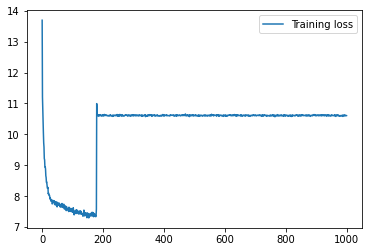

In [29]:
#plt.plot(range(len(v_loss)), v_loss, label="Validation loss")
plt.plot(range(len(v_loss)), loss, label="Training loss")
plt.legend()